la data set est formé de 178 crevette Mal et femelle

*  diff_VQ_VT : différence entre les deux extreminté bas (ventre-queueu , ventre tête)
* diff DQ_DT: différence entre les deux extrémités haut (dos queue , dos tête)
* diff_VT_DT: différence entre le bas et le haut de la tête
* diff_DQ_VQ: diffence entre le bas et le haut de la queu

* ecart-type : std entre les pixel gris de image
* mean_VT_VQ : moy de niveau de gris sur la partie basse de la crevette

* mean_DT_DQ : moy sur la partie haute de la crevette 

In [1]:
#import de scikit-learn dataset library

from sklearn import datasets

In [2]:
import pandas as pd

#Load dataset

data = pd.read_csv('data/hyalella.csv')

In [3]:
data.head()

Nom  diff_VQ_VT  diff DQ_DT  diff_VT_DT  \
0   hyalelle_020320_BB051219_female_26    1.088683    1.252581    1.847092   
1  hyalelle_030220_BB091019_femelle_62    1.127188    1.480233    1.819432   
2  hyalelle_030220_BB091019_femelle_80    0.924390    0.735934    1.242234   
3  hyalelle_030220_BB091019_femelle_70    0.942402    1.072952    1.299605   
4  hyalelle_030220_BB091019_femelle_46    1.032467    0.949331    1.400333   

   diff_DQ_VQ  species  Ecart_type  mean_VQ_VT  mean_DQ_DT  o_so  
0    0.622896        0         0.0   65.095979   39.040908     0  
1    0.721768        0         0.0   70.183148   46.684023     0  
2    0.640885        0         0.0   84.342223   62.817820     0  
3    0.876058        0         0.0   64.215049   50.046118     0  
4    0.656615        0         0.0   77.816018   53.804141     0

In [147]:
data=data.dropna()

data

Nom  diff_VQ_VT  diff DQ_DT  diff_VT_DT  \
0     hyalelle_020320_BB051219_female_26    1.088683    1.252581    1.847092   
1    hyalelle_030220_BB091019_femelle_62    1.127188    1.480233    1.819432   
2    hyalelle_030220_BB091019_femelle_80    0.924390    0.735934    1.242234   
3    hyalelle_030220_BB091019_femelle_70    0.942402    1.072952    1.299605   
4    hyalelle_030220_BB091019_femelle_46    1.032467    0.949331    1.400333   
..                                   ...         ...         ...         ...   
150            Hyalelle_270919_F5_Male_4    1.045291    1.000000    1.047459   
151     hyalelle_251119_BB180919_male_15    0.917319    0.895214    1.300183   
152           Hyalelle_270919_F5_Male_13    1.143395    0.897837    0.954078   
153           Hyalelle_270919_F5_Male_10    1.165774    1.000687    1.124575   
154      hyalelle_251119_BB180919_male_4    1.001502    0.892790    1.342291   

     diff_DQ_VQ  species  Ecart_type  mean_VQ_VT  mean_DQ_DT  o_so  
0      0.622896        0    0.000000   65.095979   39.040908     0  
1      0.721768        0    0.000000   70.183148   46.684023     0  
2      0.640885        0    0.000000   84.342223   62.817820     0  
3      0.876058        0    0.000000   64.215049   50.046118     0  
4      0.656615        0    0.000000   77.816018   53.804141     0  
..          ...      ...         ...         ...         ...   ...  
150    0.913326        1   18.977355   71.538728   67.511702     0  
151    0.750589        1   15.741793   86.396103   65.903318     0  
152    0.823034        1   17.175880   77.190548   73.006967     0  
153    0.763301        1   20.628209   74.345456   61.480826     0  
154    0.664127        1   16.690107   73.995606   52.900616     0  

[118 rows x 10 columns]

In [4]:
import numpy as np

nb_male=len(data[data['species']==1])

print ("crevette male : " , nb_male)

crevette male :  79


In [5]:
nb_femelle=data[data['species']==0][data['o_so']==0]

print("nombre de femelle sans oeuf: " , len (nb_femelle))

nombre de femelle sans oeuf:  39


/home/rochinel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [6]:
nb_femelle_sans_oeuf=len(data[data['species']==0][data['o_so']==1])

print("crevette femmelle avec  oeuf : " , nb_femelle_sans_oeuf)

crevette femmelle avec  oeuf :  37


/home/rochinel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [7]:
nb_male_avec_gnathopode=len(data[data['species']==3])

print("crevette male avec gnathope non évident" , nb_male_avec_gnathopode)

crevette male avec gnathope non évident 0


In [8]:
#Import train_test_split function 

from sklearn.model_selection import train_test_split

X=data[['Nom','diff_VQ_VT','diff_VT_DT', 'diff_DQ_VQ','mean_VQ_VT','mean_DQ_DT','Ecart_type']]  # Features
y=data['o_so'] #labels



# Split de la  dataset en jeu de donnée d'entrainement et jeu de donné de test  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [9]:
X_train_1=X_train
X_test_1=X_test

X_test_1


del X_train['Nom']
del X_test['Nom']

In [10]:
# import du model Random Forest 

from sklearn.ensemble import RandomForestClassifier

#creation d'un classifieur Gaussien 

clf = RandomForestClassifier(n_estimators=10)

#entrainement du models à partir des données d'entrainement   y_pred=clf.predict(X_test)

clf.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
#model sommary

print("************ Modele sommaire *************  \n \n")

params=clf.get_params()
for i in params.keys():
    print("----------------------------------------------------------------- \n")
    print(i,":",params[i],"\n")
    

************ Modele sommaire *************  
 

----------------------------------------------------------------- 

bootstrap : True 

----------------------------------------------------------------- 

class_weight : None 

----------------------------------------------------------------- 

criterion : gini 

----------------------------------------------------------------- 

max_depth : None 

----------------------------------------------------------------- 

max_features : auto 

----------------------------------------------------------------- 

max_leaf_nodes : None 

----------------------------------------------------------------- 

min_impurity_decrease : 0.0 

----------------------------------------------------------------- 

min_impurity_split : None 

----------------------------------------------------------------- 

min_samples_leaf : 1 

----------------------------------------------------------------- 

min_samples_split : 2 

------------------------------------------

In [49]:
#test du taux de prediction

from sklearn import metrics

#Models Accuracy , à quel dégré de le classifieur est t'il correct

y_pred = clf.predict(X_test_1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9354838709677419


In [50]:
#score du model


print("score :" , clf.score(X_test_1,y_pred))

score : 1.0


In [51]:
#probalité de prediction

print("predict log: \n" , clf.predict_log_proba(X)[:10])

predict log: 
 [[-0.10536052 -2.30258509]
 [ 0.                -inf]
 [ 0.                -inf]
 [ 0.                -inf]
 [ 0.                -inf]
 [ 0.                -inf]
 [-0.10536052 -2.30258509]
 [-0.10536052 -2.30258509]
 [ 0.                -inf]
 [ 0.                -inf]]


/home/rochinel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:635: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [52]:
# prediction sur la base de test
y_test_l = clf.predict(X_test)

y_true=list(y_test)

print("prediction vrai sur la base de test : ",np.count_nonzero(y_test_l==y_true) , "\n \n")


#prediction fausse sur la base de test

print("prediction fausse sur la base de test : ",np.count_nonzero(y_test_l!=y_true))

prediction vrai sur la base de test :  29 
 

prediction fausse sur la base de test :  2


In [53]:
#rapport de classification 

from sklearn.metrics import classification_report

target_names = ['Male', 'femelle']

print(classification_report(y_true, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.86      0.86      0.86         7

    accuracy                           0.94        31
   macro avg       0.91      0.91      0.91        31
weighted avg       0.94      0.94      0.94        31



In [54]:
#matrice de confusion

from sklearn.metrics import confusion_matrix


MC=confusion_matrix(y_true, y_pred, labels=[0,1])

print("0                             1")
for i in MC :
    for j,k in enumerate (i) :
        print("  *------------*-----------*")
        print("  |            |           |")
        print("  *  ",i[j],"      ","  ",i[j+1],"      *" )
        print("  |            |","          |")
        break
print("  *------------*-----------*")

print(1)

0                             1
  *------------*-----------*
  |            |           |
  *   23           1       *
  |            |           |
  *------------*-----------*
  |            |           |
  *   1           6       *
  |            |           |
  *------------*-----------*
1


ligne 1 : crevette sans oeuf 

ligne 2 : crevette avec oeuf

In [55]:
print (len (list (y_pred)))

print (len (list (y_test)))

31
31


In [56]:
pred=y_pred==y_test

list(pred)

X_test_1

diff_VQ_VT  diff_VT_DT  diff_DQ_VQ  mean_VQ_VT  mean_DQ_DT  Ecart_type
147    0.910350    1.159247    0.793750   88.580868   75.183561   18.115447
119    1.239113    1.212459    0.827228   74.233104   63.723319   22.210542
95     0.983462    1.122138    0.739590   98.651856   82.112092   17.406547
51     1.051805    0.869581    0.836513   37.614271   37.878669   23.721134
31     1.000000    1.046720    0.921046   52.103126   43.979598    0.000000
71     0.928051    1.268264    0.562246   81.232716   57.441865   21.822478
136    1.031229    1.124430    0.785000   77.556913   65.515544   20.415002
16     1.233516    1.254695    0.717866   51.738735   39.171873    0.000000
93     1.022018    1.253590    0.679498   64.478547   47.986683   17.577635
12     1.000000    1.000000    1.142879   56.923445   65.056625    0.000000
100    1.051816    1.133866    0.730794   72.012121   57.357595   21.933702
70     0.744018    1.298650    0.840001   70.877480   56.318927   17.664877
148    0.885980    1.217056    0.917856   76.316499   66.392679   14.430651
154    1.001502    1.342291    0.664127   73.995606   52.900616   16.690107
21     1.017114    1.427580    0.592119   70.925840   45.628478    0.000000
37     1.063060    1.426298    0.630453   66.685518   44.704916    0.000000
32     1.005936    1.418591    0.595462   66.751830   44.255721    0.000000
52     0.753031    1.254311    1.001154   66.636466   58.424209   19.648209
102    0.973671    1.117859    0.866273   76.173548   67.249395   15.663763
9      1.041512    1.853936    0.587928   79.499168   45.156988    0.000000
48     0.745756    1.243599    0.907266   68.799573   58.905906   17.493758
80     0.946214    1.177657    0.725957   84.574727   67.958090   18.709861
67     0.687498    1.237375    0.834057   52.928945   44.261654   22.571666
146    1.063312    1.038986    0.845126   75.806772   69.224544   17.623062
33     1.068101    1.292998    0.830323   72.043523   56.603148    0.000000
81     0.926838    1.347944    0.851220   88.495884   70.796705   15.195704
56     1.261760    0.998971    0.976991   72.787709   74.246142   28.560409
103    0.966154    1.279523    0.701497   80.019207   59.572756   19.653611
38     0.845728    1.147266    1.030635   42.849550   39.724009    0.000000
122    0.966860    1.165971    0.730002   87.480345   69.882481   20.795054
20     0.831177    1.475568    0.721037   76.359772   53.490236    0.000000

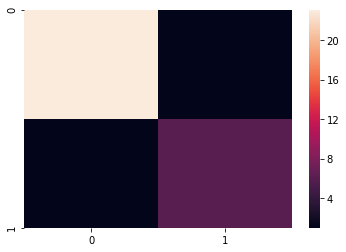

In [57]:
#Matrice de confusion
import matplotlib.pyplot as plt

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(MC)
plt.show()

## Recherche des features important

In [118]:
feature_name = list(data.columns.values)
feature_name.remove('species')
feature_name.remove('diff DQ_DT')
feature_name.remove('Nom')
feature_name.remove('o_so')
print(feature_name)


['diff_VQ_VT', 'diff_VT_DT', 'diff_DQ_VQ', 'Ecart_type', 'mean_VQ_VT', 'mean_DQ_DT']


In [119]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_name).sort_values(ascending=False)
feature_imp

diff_VQ_VT    0.362368
mean_DQ_DT    0.165910
Ecart_type    0.140307
diff_DQ_VQ    0.117521
diff_VT_DT    0.107036
mean_VQ_VT    0.106857
dtype: float64

No handles with labels found to put in legend.


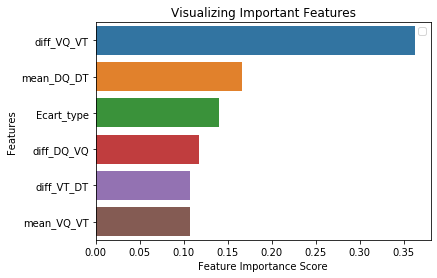

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [27]:
from sklearn.model_selection import cross_val_predict , cross_val_score

In [28]:
_X=X
_data=data

In [29]:
del _X['Nom']
del _data['Nom']

In [34]:
score_2 = cross_val_score(clf, _X , y , cv=10)

print ("cross validation score :" , score_2)

cross validation score : [1.         0.875      0.75       1.         0.75       0.9375
 0.9375     0.93333333 0.85714286 0.92857143]


Text(0, 0.5, 'prediction')

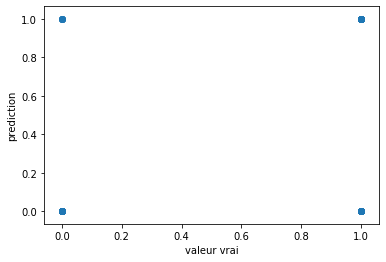

In [63]:
cross_pred = cross_val_predict(clf , _X , y , cv=10)

plt.scatter(y,cross_pred)
plt.xlabel("valeur vrai")
plt.ylabel("prediction")

In [65]:
MC=confusion_matrix(y,cross_pred, labels=[0,1])

print("0                             1")
for i in MC :
    for j,k in enumerate (i) :
        print("  *------------*-----------*")
        print("  |            |           |")
        print("  *  ",i[j],"      ","  ",i[j+1],"      *" )
        print("  |            |","          |")
        break
print("  *------------*-----------*")

print(1)

0                             1
  *------------*-----------*
  |            |           |
  *   114           4       *
  |            |           |
  *------------*-----------*
  |            |           |
  *   12           25       *
  |            |           |
  *------------*-----------*
1
